Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'min_salary',
       'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_type', 'expiry',
       'formatted_experience_level', 'listed_time', 'sponsored', 'work_type',
       'currency', 'compensation_type', 'normalized_salary', 'zip_code',
       'fips', 'log_applications', 'desc_char_count', 'desc_word_count',
       'applications', 'application_proportion', 'industry', 'employee_count',
       'follower_count', 'time_recorded', 'employee_bin', 'application_level',
       'application_share_pct', 'lemmas', 'word_count', 'sentence_count',
       'avg_word_length', 'ttr', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'personal_pronoun_ratio', 'inclusive_pronoun_ratio',
       'third_person_ratio', 'modal_verb_ratio', 'personal_count',
       'inclusive_count', 'third_person_count', 'modal_co

/var/folders/8d/41krvnl108742n4xzr8g0zj80000gn/T/ipykernel_11088/2370424791.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=melted, x='Emotion', y='Score', hue=industry_col, ci='sd')
/var/folders/8d/41krvnl108742n4xzr8g0zj80000gn/T/ipykernel_11088/2370424791.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


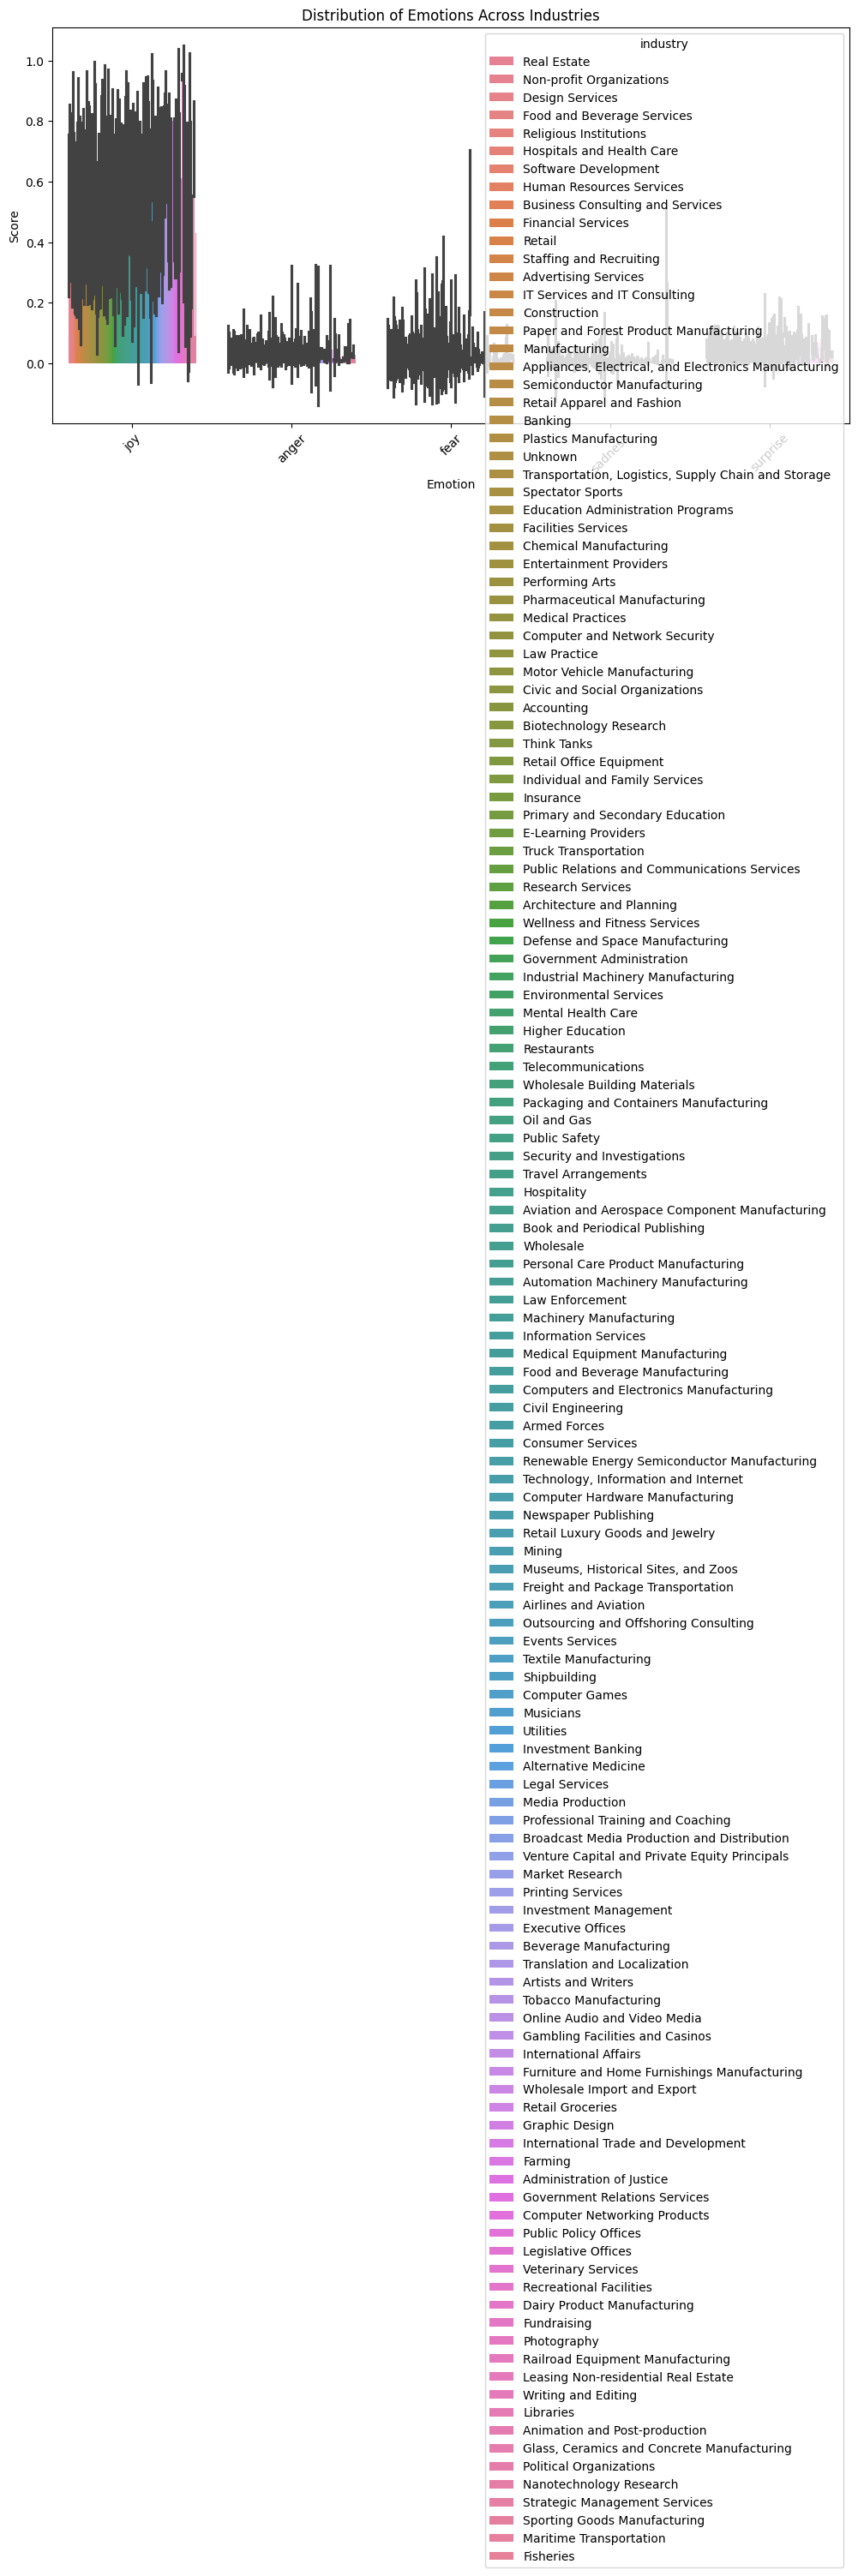

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/Users/elifakdeniz/Desktop/Thesis_New/Notebooks/Jupyter_notebook/Future Engineering/1_final_dataset_with_sentiment.csv')

# Optional: check columns
print(df.columns)

# Assuming your emotions are columns like 'joy', 'anger', etc.
emotion_cols = ['joy', 'anger', 'fear', 'sadness', 'surprise']  # Adjust based on your dataset
industry_col = 'industry'  # Or 'sector', confirm the exact column name

# Melt the DataFrame for plotting
melted = df.melt(id_vars=[industry_col], value_vars=emotion_cols, var_name='Emotion', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Emotion', y='Score', hue=industry_col, ci='sd')
plt.title('Distribution of Emotions Across Industries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


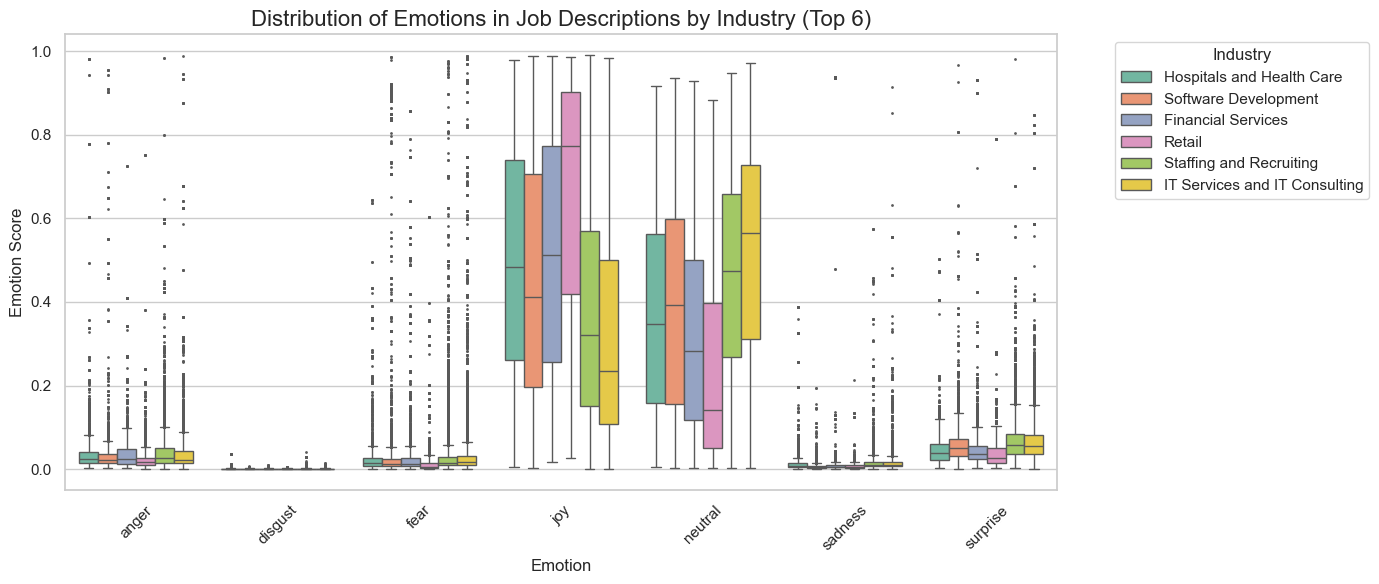

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/Users/elifakdeniz/Desktop/Thesis_New/Notebooks/Jupyter_notebook/Future Engineering/1_final_dataset_with_sentiment.csv')

# Emotion columns
emotion_cols = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Step 1: Get Top 6 industries by frequency
top_industries = df['industry'].value_counts().head(6).index.tolist()

# Step 2: Filter dataset
filtered_df = df[df['industry'].isin(top_industries)]

# Step 3: Melt the emotion columns for plotting
melted = filtered_df.melt(id_vars=['industry'], value_vars=emotion_cols,
                          var_name='Emotion', value_name='Score')

# Step 4: Plot with seaborn
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", palette="Set2")
sns.boxplot(data=melted, x='Emotion', y='Score', hue='industry', fliersize=1)

# Labels and title
plt.title('Distribution of Emotions in Job Descriptions by Industry (Top 6)', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Emotion Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Optional: Save as high-res image
plt.savefig("emotion_distribution_by_industry_top6.png", dpi=300, bbox_inches='tight')
plt.show()


Text(0.5, 1.0, 'Joy Score vs. Application Rate')

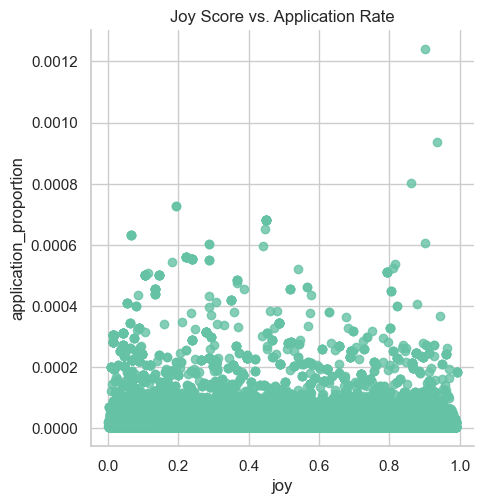

In [5]:
# Example: Joy vs. application rate
sns.lmplot(data=df, x='joy', y='application_proportion')
plt.title('Joy Score vs. Application Rate')


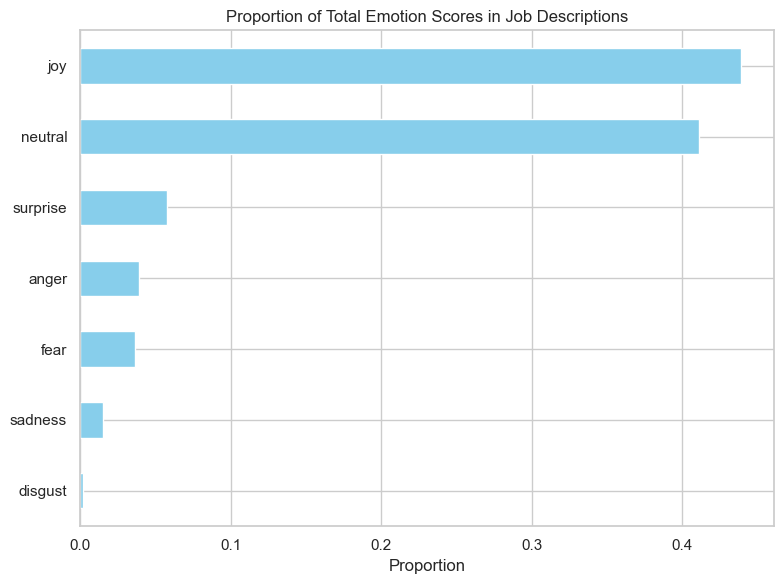

In [6]:
# Emotion columns
emotion_cols = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Step 1: Sum all emotion scores
emotion_totals = df[emotion_cols].sum()

# Step 2: Normalize to proportions
emotion_proportions = emotion_totals / emotion_totals.sum()

# Plot
plt.figure(figsize=(8, 6))
emotion_proportions.sort_values().plot(kind='barh', color='skyblue')
plt.title('Proportion of Total Emotion Scores in Job Descriptions')
plt.xlabel('Proportion')
plt.tight_layout()
plt.show()


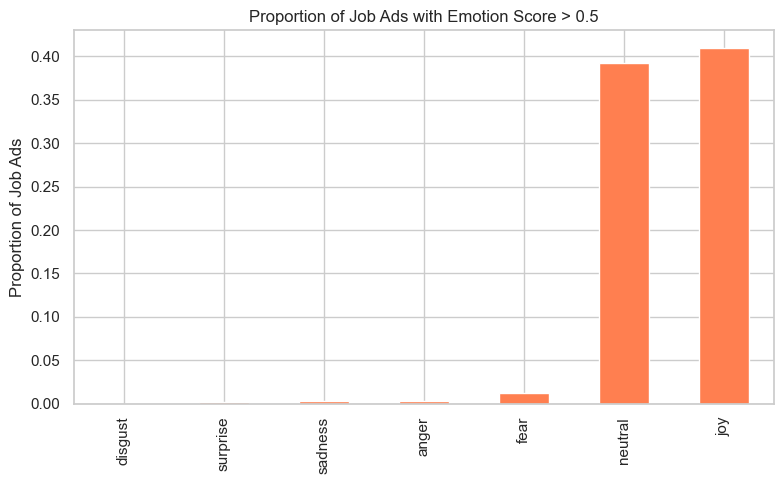

In [8]:
emotion_threshold = 0.5
strong_emotion_counts = (df[emotion_cols] > emotion_threshold).sum()
strong_emotion_proportions = strong_emotion_counts / len(df)

# Plot
plt.figure(figsize=(8, 5))
strong_emotion_proportions.sort_values().plot(kind='bar', color='coral')
plt.title(f'Proportion of Job Ads with Emotion Score > {emotion_threshold}')
plt.ylabel('Proportion of Job Ads')
plt.tight_layout()
plt.show()


In [9]:
# Filter for high fear scores
fear_threshold = 0.5  # Adjust as needed
high_fear_df = df[df['fear'] > fear_threshold]

# Sort by fear score (descending)
high_fear_df = high_fear_df.sort_values(by='fear', ascending=False)

# Show top 5 job titles and descriptions
high_fear_df[['title', 'description_clean', 'fear']].head(5)


,title,description_clean,fear
28614,"Territory Sales Manager, Law Enforcement",who is flock flock safety provides the first p...,0.992596
28613,"Territory Sales Manager, Law Enforcement",who is flock flock safety provides the first p...,0.992596
28612,"Territory Sales Manager, Law Enforcement",who is flock flock safety provides the first p...,0.992596
28611,"Territory Sales Manager, Law Enforcement",who is flock flock safety provides the first p...,0.992596
33157,Data Management Coordinator,we hold our people our customers and our brand...,0.992404


In [12]:
# Before dropping
print(f"Original number of rows: {df.shape[0]}")

# Drop duplicates based on 'description_clean' column
df = df.drop_duplicates(subset='description_clean', keep='first')

# After dropping
print(f"After removing duplicates: {df_deduplicated.shape[0]}")


Original number of rows: 70000
After removing duplicates: 21063


In [13]:
# Set a threshold — adjust as needed
fear_threshold = 0.5

# Filter job ads with fear score above the threshold
high_fear_df = df[df['fear'] > fear_threshold].sort_values(by='fear', ascending=False)

# Preview top results
high_fear_df[['title', 'industry', 'description_clean', 'fear']].head(10)


,title,industry,description_clean,fear
28611,"Territory Sales Manager, Law Enforcement",Public Safety,who is flock flock safety provides the first p...,0.992596
33157,Data Management Coordinator,Retail Apparel and Fashion,we hold our people our customers and our brand...,0.992404
55920,Data Analyst,Public Safety,who is flock flock safety is an allinone techn...,0.990587
21538,Corporate Development Analyst,IT Services and IT Consulting,title corporate development analyst company su...,0.987896
56751,"Technical Program Manager, Robotics",Research Services,at google deepmind we value diversity of exper...,0.987133
17287,"Software Engineer, Automation & Tooling",Software Development,the hubspot people operations data group is de...,0.986881
12738,Capital Project Manager,IT Services and IT Consulting,capital project managera globally renowned che...,0.985211
53580,Salesforce Product Owner/BA,Wholesale Building Materials,the digital business team at assa abloy is res...,0.984192
45834,Help Desk Analyst,IT Services and IT Consulting,akkodis is seeking a help desk analyst for a c...,0.983141
65,Accounts Payable Specialist,Chemical Manufacturing,soyventis is a global chemical supply chain co...,0.982100


In [14]:
# Set a threshold for fear
fear_threshold = 0.5  # You can adjust (e.g., 0.4 or 0.6)

# Sort and filter high-fear descriptions
high_fear_df = df[df['fear'] > fear_threshold].sort_values(by='fear', ascending=False)

# Show top 5 descriptions (first 200 words)
for i, row in high_fear_df[['title', 'industry', 'description_clean', 'fear']].head(5).iterrows():
    print(f"\n Job Title: {row['title']}")
    print(f"Industry: {row['industry']} | Fear Score: {row['fear']:.2f}")
    print("Description (first 200 words):\n")
    print(' '.join(row['description_clean'].split()[:200]))
    print("-" * 80)



 Job Title: Territory Sales Manager, Law Enforcement
Industry: Public Safety | Fear Score: 0.99
Description (first 200 words):

who is flock flock safety provides the first public safety operating system that empowers private communities and law enforcement to work together to eliminate crime we are committed to protecting human privacy and mitigating bias in policing with the development of bestinclass technology rooted in ethical design which unites civilians and public servants in pursuit of a safer more equitable society our safetyasaservice approach includes affordable devices powered by lte and solar that can be installed anywhere our technology detects and captures objective details decodes evidence in realtime and delivers investigative leads into the hands of those who matter while safety is a serious business we are a supportive team that is optimizing the remote experience to create strong and fun relationships even when we are physically apart our flock of hardworking empl

In [15]:
# OPTIONAL: Standardize text again just in case
df['description_clean'] = df['description_clean'].astype(str).str.strip().str.lower()

# Drop duplicate descriptions
df = df.drop_duplicates(subset='description_clean', keep='first')

# Save to new CSV file
df.to_csv('final_dataset_deduplicated.csv', index=False)

print("✅ Cleaned dataset saved as 'final_dataset_deduplicated.csv'")


✅ Cleaned dataset saved as 'final_dataset_deduplicated.csv'


In [19]:
emotion_cols = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
df['emotional_intensity'] = df[emotion_cols].sum(axis=1)
# Create quantiles
q1 = df['emotional_intensity'].quantile(0.33)
q2 = df['emotional_intensity'].quantile(0.66)

# Categorize based on quantiles
def classify_intensity(score):
    if score < q1:
        return 'Low'
    elif score < q2:
        return 'Medium'
    else:
        return 'High'

df['emotional_intensity_level'] = df['emotional_intensity'].apply(classify_intensity)
df[['emotional_intensity', 'emotional_intensity_level']].head()


,emotional_intensity,emotional_intensity_level
0,0.946878,High
1,0.845294,High
2,0.426713,Low
3,0.893377,High
4,0.870671,High


In [20]:
df.to_csv('final_dataset_with_emotion_categories.csv', index=False)


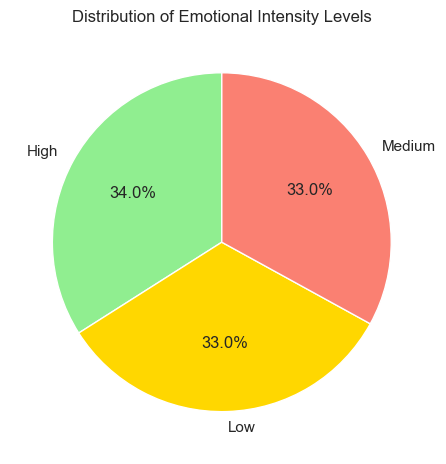

In [21]:
import matplotlib.pyplot as plt

df['emotional_intensity_level'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightgreen', 'gold', 'salmon'],
    startangle=90,
    title='Distribution of Emotional Intensity Levels',
    ylabel=''
)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# Load your CSV
df = pd.read_csv('/Users/elifakdeniz/Desktop/Thesis_New/Notebooks/Jupyter_notebook/Future Engineering/1_final_dataset_with_sentiment.csv')

# Basic Overview
print("Total rows:", len(df))
print("Unique job descriptions:", df['description_clean'].nunique())
print("Unique industries:", df['industry'].nunique())

# Description length statistics
print("Min description length:", df['desc_word_count'].min())
print("Max description length:", df['desc_word_count'].max())
print("Mean description length:", df['desc_word_count'].mean())
print("Median description length:", df['desc_word_count'].median())


Total rows: 70000
Unique job descriptions: 21063
Unique industries: 140
Min description length: 21
Max description length: 2790
Mean description length: 500.11062857142855
Median description length: 442.0


In [25]:
df.head(10)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,modal_count,desc_tokens,description_clean,anger,disgust,fear,joy,neutral,sadness,surprise
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,17.0,...,0.0,"['job', 'descriptiona', 'leading', 'real', 'es...",job descriptiona leading real estate firm in n...,0.007679,0.000650,0.001900,0.911083,0.053122,0.002938,0.022628
1,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,14.0,...,0.0,"['job', 'summarythe', 'economic', 'development...",job summarythe economic development planning i...,0.063967,0.001047,0.016772,0.584575,0.154706,0.125784,0.053150
2,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,60000.0,...,0.0,"['company', 'descriptionraw', 'cereal', 'is', ...",company descriptionraw cereal is a creative de...,0.010720,0.000936,0.009489,0.178955,0.573286,0.016077,0.210537
3,9615617,"Glastender, Inc.",Inside Customer Service Associate,Glastender Inc. is a family-owned manufacturer...,NaN,NaN,"Saginaw, MI",1194336.0,4.0,NaN,...,0.0,"['glastender', 'inc', 'is', 'a', 'familyowned'...",glastender inc is a familyowned manufacturer o...,0.014659,0.000577,0.009076,0.817529,0.106623,0.005407,0.046128
4,111513530,United Methodists of Greater New Jersey,"Content Writer, Communications","Application opening date: April 24, 2024\nTitl...",NaN,NaN,Greater Philadelphia,4028816.0,10.0,NaN,...,0.0,"['application', 'opening', 'date', 'april', 't...",application opening date april title content w...,0.019976,0.000699,0.005662,0.809778,0.129329,0.008757,0.025797
5,115639136,Shannon Waltchack,Controller,WORK @ SWShannon Waltchack (SW) is seeking a C...,NaN,NaN,"Birmingham, AL",988555.0,61.0,NaN,...,0.0,"['work', 'swshannon', 'waltchack', 'sw', 'is',...",work swshannon waltchack sw is seeking a comme...,0.077840,0.001025,0.007688,0.589379,0.233366,0.007337,0.083365
6,117675818,Premier Family Clinic,Physician Assistant,We are seeking a qualified Physician Assistant...,NaN,NaN,"Atlanta, GA",4285947.0,29.0,NaN,...,0.0,"['we', 'are', 'seeking', 'a', 'qualified', 'ph...",we are seeking a qualified physician assistant...,0.005932,0.001034,0.008399,0.754706,0.195446,0.007844,0.026639
7,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,NaN,NaN,"Denver, CO",76987056.0,273.0,NaN,...,0.0,"['job', 'descriptiongoyt', 'is', 'seeking', 'a...",job descriptiongoyt is seeking a skilled and m...,0.024295,0.001113,0.009028,0.789289,0.138395,0.006778,0.031102
8,266566927,Revesco Properties,Marketing & Office Coordinator,About Revesco Properties:Revesco Properties is...,75000.0,YEARLY,"Denver, CO",8577252.0,13.0,55000.0,...,0.0,"['about', 'revesco', 'propertiesrevesco', 'pro...",about revesco propertiesrevesco properties is ...,0.038403,0.001187,0.021897,0.395719,0.431066,0.015261,0.096467
9,358267047,ADEPT HRM Solutions,Production Planner (Food Technologist),Job Summary: We are seeking a skilled Producti...,NaN,NaN,"Concord, NC",348976.0,6.0,NaN,...,0.0,"['job', 'summary', 'we', 'are', 'seeking', 'a'...",job summary we are seeking a skilled productio...,0.019562,0.001730,0.008225,0.321919,0.621108,0.006435,0.021021


In [30]:
df[['job_id', 'company_name', 'title', 'description', 'location', 'company_id', 'views', 'applies']].count()


job_id          70000
company_name    69999
title           70000
description     70000
location        70000
company_id      70000
views           70000
applies         70000
dtype: int64

In [31]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.
